<a href="https://colab.research.google.com/github/SMattFoley/MachineLearningProject/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports and getting data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import math
from google.colab import files, drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

uploaded_files = files.upload()
# Load data, forcing it into a 2D array
data = pd.read_csv('star_classification.csv')

# Check the shape of the array
print(data.shape)  # Should print (num_rows, num_columns)

if 'class_encoded' not in data.columns:
    data['class_encoded'] = data['class'].map({'GALAXY': 0, 'STAR': 1, 'QSO': 2})

# Filter out rows where 'u', 'g', or 'z' are -9999
data = data[(data['u'] != -9999) & (data['g'] != -9999) & (data['z'] != -9999)]
print("Data shape after filtering:", data.shape)




Saving star_classification.csv to star_classification.csv
(100000, 18)
Data shape after filtering: (99999, 19)


# Data Analysis

<ipython-input-3-2fe075353695>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette="blend:#7AB,#EDA")


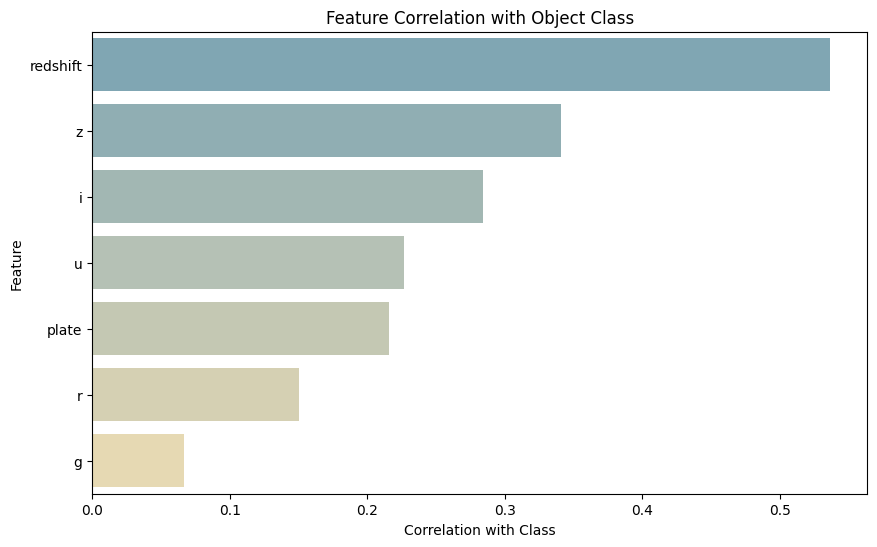

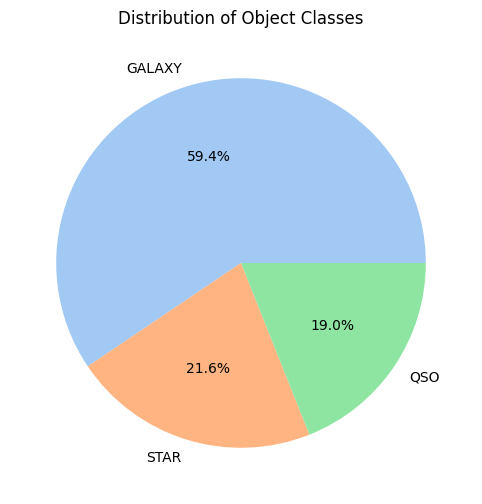

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Names of the columns we will actually use in our model
names = ['u', 'r', 'g', 'i', 'z', 'redshift', 'plate']

# Distribution of each data column
def show_distribitions():
  for column in names:
      plt.figure(figsize=(8, 5))
      sns.histplot(data[column], bins=30, kde=True)
      plt.title(f'Distribution of {column}')
      plt.xlabel(column)
      plt.ylabel('Count')
      plt.show()

# show_distribitions()

# Compute correlations with the encoded class
correlations = data[names + ['class_encoded']].corr()['class_encoded'].drop('class_encoded')  # Ensure 'class_encoded' exists

# Sort by absolute correlation value
correlations = correlations.abs().sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette="blend:#7AB,#EDA")
plt.xlabel('Correlation with Class')
plt.ylabel('Feature')
plt.title('Feature Correlation with Object Class')
plt.show()


class_counts = data['class'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Distribution of Object Classes')
plt.show()

# Random Forest model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

names = ['u', 'r', 'g', 'i', 'z', 'redshift', 'plate']

X = data[names]
y = data['class_encoded']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Get feature importances
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': names, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="coolwarm")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()


# SVM Classifier

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

names = ['u', 'r', 'g', 'i', 'z', 'redshift', 'plate']

X = data[names]
y = data['class_encoded']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use the same scaler for test data

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


from sklearn.inspection import permutation_importance

# Compute feature importance
result = permutation_importance(svm_model, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42)
importance_scores = result.importances_mean

# Convert to DataFrame
feature_importance_df = pd.DataFrame({'Feature': names, 'Importance': importance_scores})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="coolwarm")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("SVM Feature Importance (Permutation Importance)")
plt.show()


# Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

names = ['u', 'r', 'g', 'i', 'z', 'redshift', 'plate']

X = data[names]
y = data['class_encoded']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use the same scaler for test data

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute feature importance
result = permutation_importance(model, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42)
importance_scores = result.importances_mean

# Convert to DataFrame
feature_importance_df = pd.DataFrame({'Feature': names, 'Importance': importance_scores})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="coolwarm")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Logistic Regression Feature Importance (Permutation Importance)")
plt.show()

